In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage

In [108]:
img = cv2.imread("Images/1/Elaine.bmp", cv2.IMREAD_GRAYSCALE)

In [3]:
def imshow(*args, figsize=7, to_rgb=True, title=None, fontsize=12):
    if isinstance(figsize, int):
        figsize = (figsize, figsize)
    images = args[0] if type(args[0]) is list else list(args)
    if to_rgb:
        images = list(map(lambda x: cv2.cvtColor(x, cv2.COLOR_BGR2RGB), images))
    if title is not None:
        assert len(title) == len(images), "Please provide a title for each image."
    plt.figure(figsize=figsize)
    for i in range(1, len(images)+1):
        plt.subplot(1, len(images), i)
        if title is not None:
            plt.title(title[i-1], fontsize=fontsize)
        plt.imshow(images[i-1])
        plt.axis('off')

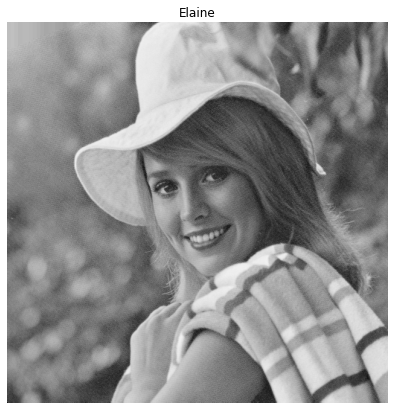

In [113]:
imshow(img, title=['Elaine'])

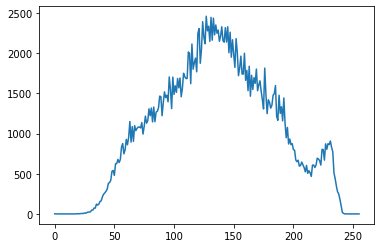

In [110]:
histr = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histr)
plt.show()

## 1.1.1 Quantization and histogram

#### without histogram equalization 

In [111]:
def quantize_simulation(image, n_bits):
    coeff = 2**8 // 2**n_bits
    return (image // coeff) * coeff

img2bit = quantize_simulation(img, 2)
img3bit = quantize_simulation(img, 3)
img4bit = quantize_simulation(img, 4)
img5bit = quantize_simulation(img, 5)
img6bit = quantize_simulation(img, 6)
img7bit = quantize_simulation(img, 7)

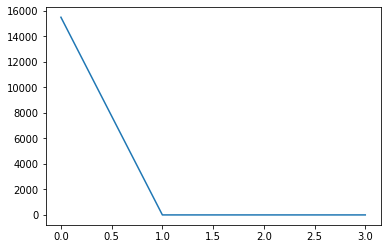

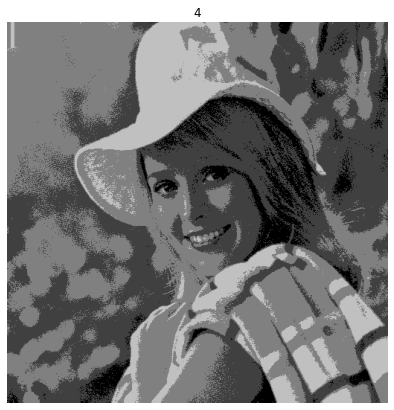

In [112]:
histr = cv2.calcHist([img2bit],[0],None,[4],[0,4])
plt.plot(histr)
plt.show()

imshow(img2bit, title=['4'])

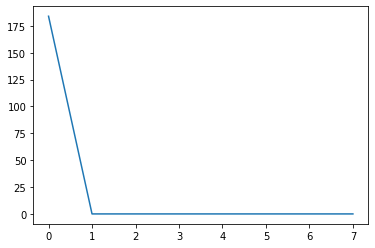

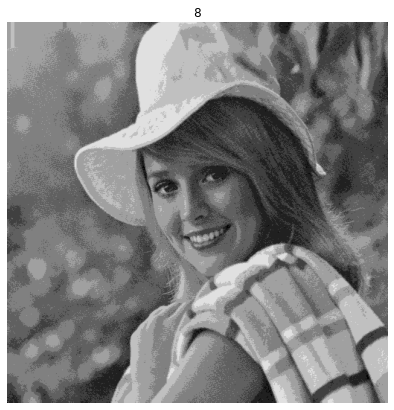

In [8]:
histr = cv2.calcHist([img3bit],[0],None,[8],[0,8])
plt.plot(histr)
plt.show()

imshow(img3bit, title=['8'])

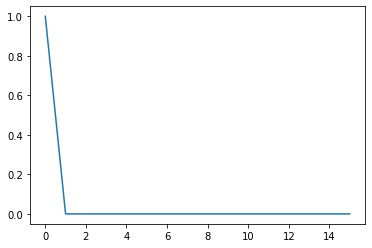

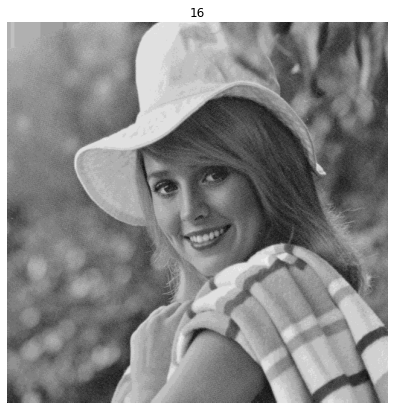

In [9]:
histr = cv2.calcHist([img4bit],[0],None,[16],[0,16])
plt.plot(histr)
plt.show()

imshow(img4bit, title=['16'])

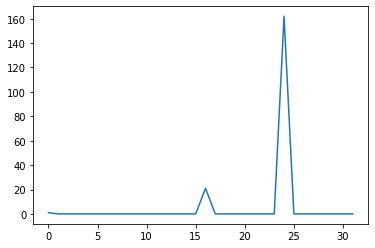

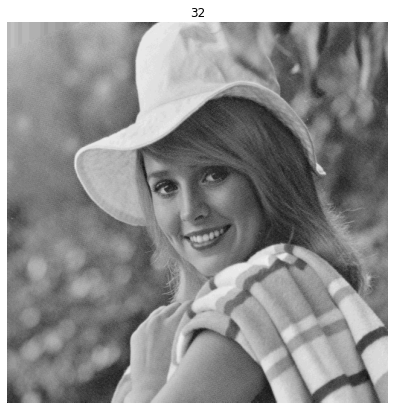

In [10]:
histr = cv2.calcHist([img5bit],[0],None,[32],[0,32])
plt.plot(histr)
plt.show()

imshow(img5bit, title=['32'])

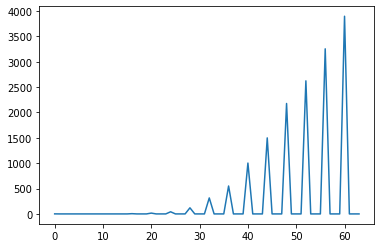

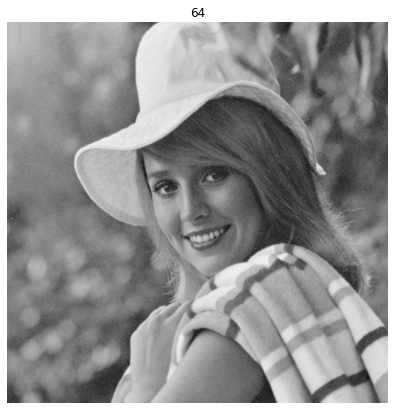

In [11]:
histr = cv2.calcHist([img6bit],[0],None,[64],[0,64])
plt.plot(histr)
plt.show()

imshow(img6bit, title=['64'])

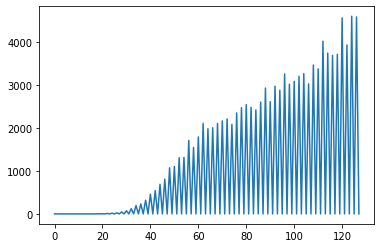

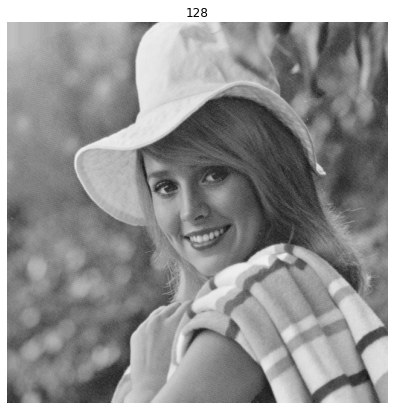

In [12]:
histr = cv2.calcHist([img7bit],[0],None,[128],[0,128])
plt.plot(histr)
plt.show()

imshow(img7bit, title=['128'])

### with histogram equalization 

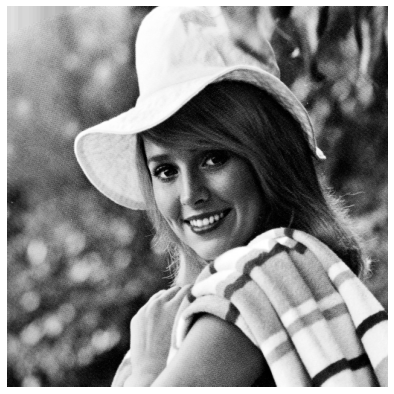

In [13]:
img_eq = cv2.equalizeHist(img)
imshow(img_eq)

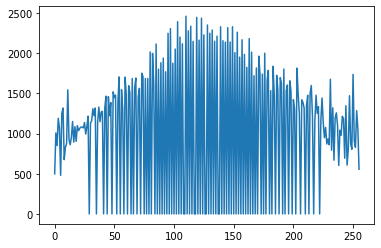

In [14]:
histr = cv2.calcHist([img_eq],[0],None,[256],[0,256])
plt.plot(histr)
plt.show()

In [15]:
imgeq2bit = quantize_simulation(img_eq, 2)
imgeq3bit = quantize_simulation(img_eq, 3)
imgeq4bit = quantize_simulation(img_eq, 4)
imgeq5bit = quantize_simulation(img_eq, 5)
imgeq6bit = quantize_simulation(img_eq, 6)
imgeq7bit = quantize_simulation(img_eq, 7)

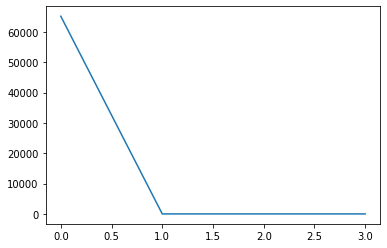

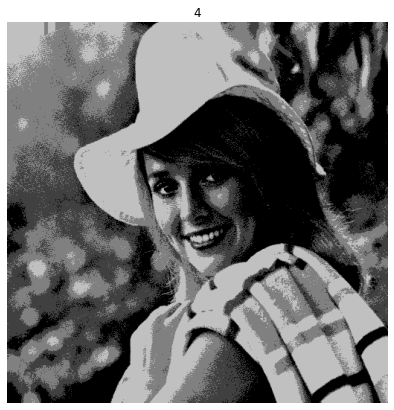

In [16]:
histr = cv2.calcHist([imgeq2bit],[0],None,[4],[0,4])
plt.plot(histr)
plt.show()

imshow(imgeq2bit, title=['4'])

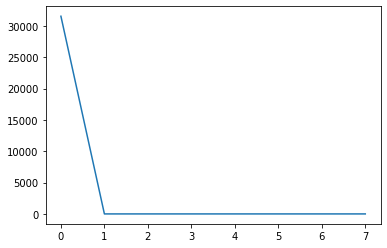

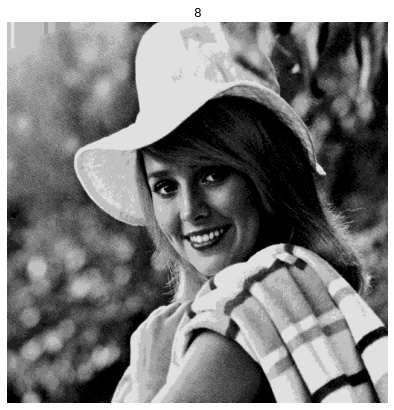

In [17]:
histr = cv2.calcHist([imgeq3bit],[0],None,[8],[0,8])
plt.plot(histr)
plt.show()

imshow(imgeq3bit, title=['8'])

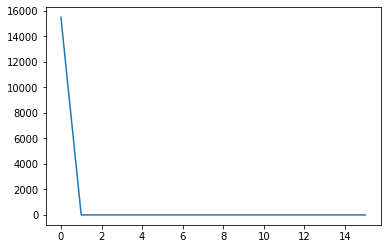

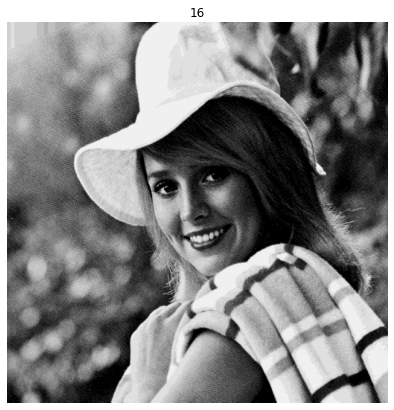

In [18]:
histr = cv2.calcHist([imgeq4bit],[0],None,[16],[0,16])
plt.plot(histr)
plt.show()

imshow(imgeq4bit, title=['16'])

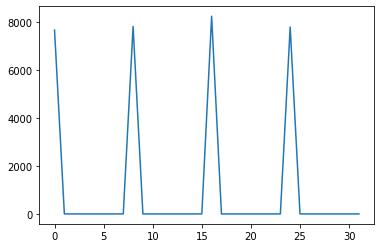

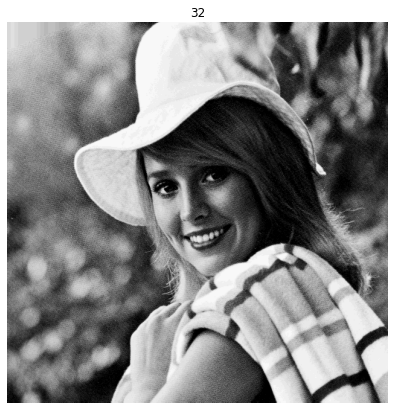

In [19]:
histr = cv2.calcHist([imgeq5bit],[0],None,[32],[0,32])
plt.plot(histr)
plt.show()

imshow(imgeq5bit, title=['32'])

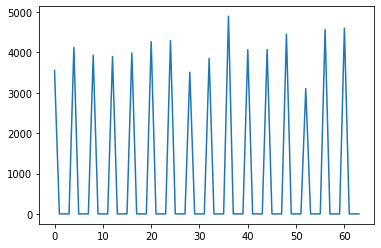

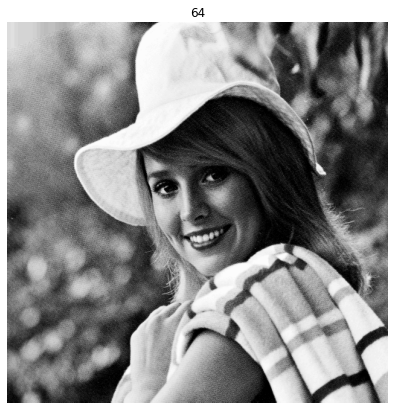

In [20]:
histr = cv2.calcHist([imgeq6bit],[0],None,[64],[0,64])
plt.plot(histr)
plt.show()

imshow(imgeq6bit, title=['64'])

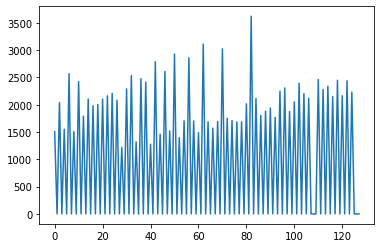

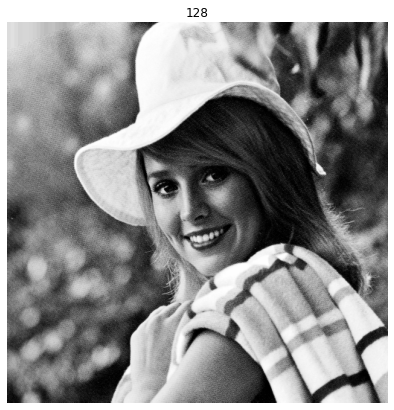

In [21]:
histr = cv2.calcHist([imgeq7bit],[0],None,[128],[0,128])
plt.plot(histr)
plt.show()

imshow(imgeq7bit, title=['128'])

In [22]:
def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the sum of the squared difference between the two images
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    # return the MSE, the lower the error, the more "similar" the two images are
    return err

In [23]:
mse(img, img2bit)

1346.5180892944336

In [24]:
mse(img_eq, imgeq2bit)

1324.6953659057617

In [25]:
mse(img, img3bit)

325.0481185913086

In [26]:
mse(img_eq, imgeq3bit)

324.7893600463867

In [27]:
mse(img, img4bit)

77.3164291381836

In [28]:
mse(img_eq, imgeq4bit)

75.75713348388672

In [29]:
mse(img, img5bit)

17.381858825683594

In [30]:
mse(img_eq, imgeq5bit)

17.82244110107422

In [31]:
mse(img, img6bit)

3.4688339233398438

In [32]:
mse(img_eq, imgeq6bit)

3.9499435424804688

In [33]:
mse(img, img7bit)

0.5092544555664062

In [34]:
mse(img_eq, imgeq7bit)

0.5852737426757812

# 1.1.2

In [35]:
img=cv2.imread("Images/1/Elaine.bmp")

In [36]:
def program(img):
    #downsample without averaging
    ds = cv2.pyrDown(img)
    print(img.shape)
    print(ds.shape)
    
    #upsample
    us = cv2.pyrUp(ds)
    print(us.shape)
    
    imshow(img, ds, us, title=['img', 'ds', 'us'], figsize=20)

    
    #downsample with averaging
#     downsample = 2
#     # first, change to 0-1
#     ds_array = img/255
#     r = skimage.measure.block_reduce(ds_array[:, :, 0],
#                                  (downsample, downsample),
#                                  np.mean)
#     g = skimage.measure.block_reduce(ds_array[:, :, 1],
#                                      (downsample, downsample),
#                                      np.mean)
#     b = skimage.measure.block_reduce(ds_array[:, :, 2],
#                                      (downsample, downsample),
#                                      np.mean)
#     ds_array = np.stack((r, g, b), axis=-1)
#     print(ds_array.shape)
# #     cv2.imshow("r", ds_array)
# #     cv2.waitKey(0)
#     imshow(img, ds_array, title=['img', 'ds'])

(512, 512, 3)
(256, 256, 3)
(512, 512, 3)


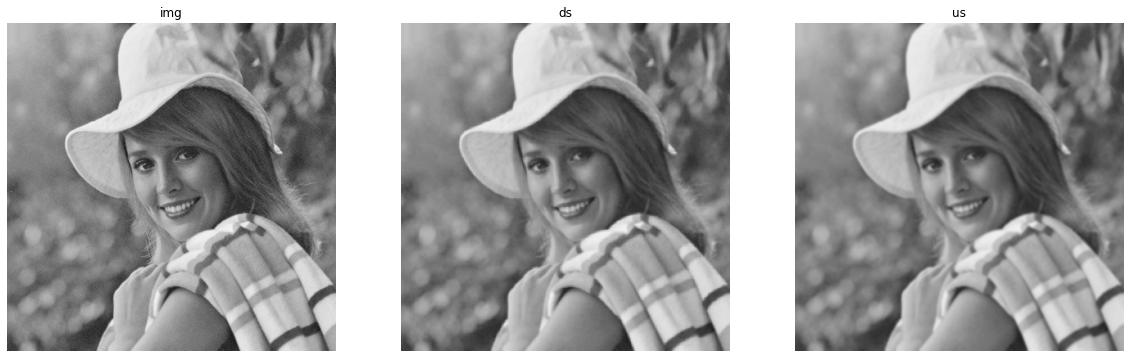

In [37]:
program(img)

# 1.1.3

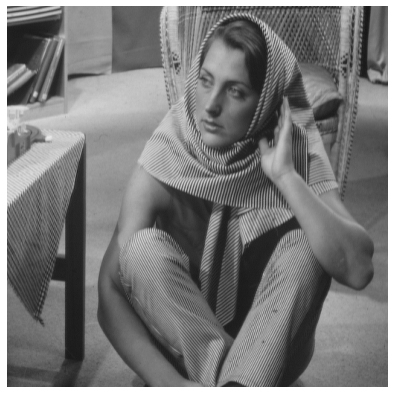

In [121]:
img=cv2.imread("Images/1/barbara.bmp", cv2.IMREAD_GRAYSCALE)
imshow(img)

In [119]:
def graylevelsChange(image, bit):
    n = 2**bit
#     for i in range(len(image)):
#         for j in range(len(image[i])):
#             image[i][j]= (image[i][j]*n)/256
#     return image
    coeff = 2**8 // n
    return (image // coeff) * coeff


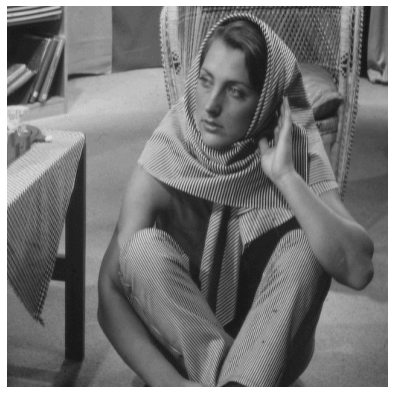

In [122]:
image_5 = graylevelsChange(img, 5)
imshow(image_5)

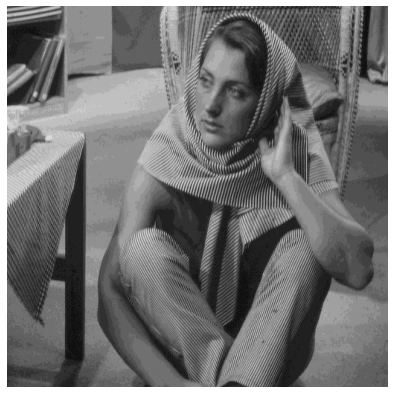

In [123]:
image_4 = graylevelsChange(img, 4)
imshow(image_4)

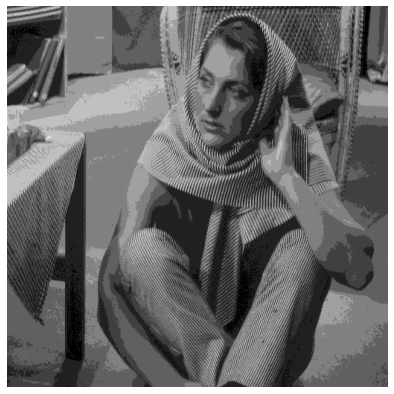

In [124]:
image_3 = graylevelsChange(img, 3)
imshow(image_3)

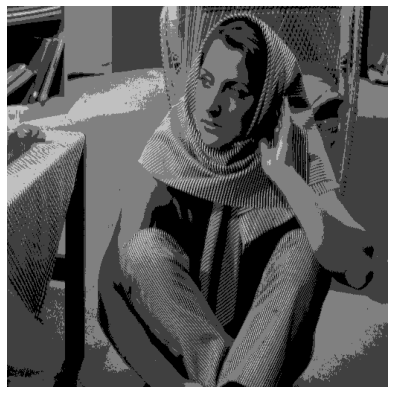

In [126]:
image_2 = graylevelsChange(img, 2)
imshow(image_2)

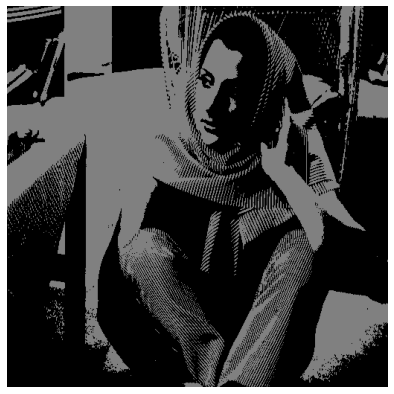

In [127]:
image_1 = graylevelsChange(img, 1)
imshow(image_1)